In [2]:
import os, os.path
import json
from PIL import Image
import requests
from pycocotools.coco import COCO
!pip install matplotlib==2.2.3 numpy==1.19.5 pillow==8.2.0 requests==2.25.1
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import numpy as np
%reload_ext autoreload
%autoreload

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install -U 'git+https://github.com/leimao/cocoapi.git#subdirectory=PythonAPI'
!wget -c http://images.cocodataset.org/annotations/annotations_trainval2017.zip

  Cloning https://github.com/leimao/cocoapi.git to /tmp/pip-req-build-1v65t5rx
  Running command git clone -q https://github.com/leimao/cocoapi.git /tmp/pip-req-build-1v65t5rx
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=263922 sha256=169898c44b4a159e6ea136cd8c6f0a70e638fa62b64cbbca4827b349f6aa5909
  Stored in directory: /tmp/pip-ephem-wheel-cache-t970i3t2/wheels/ae/69/62/b04044fd6c6a67df4cf915150a18dbfb0afdee4bedada04049
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.3
    Uninstalling pycocotools-2.0.3:
      Successfully uninstalled pycocotools-2.0.3


--2021-12-16 22:10:14--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.107.4
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.107.4|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  46.2MB/s    in 5.6s    

2021-12-16 22:10:20 (42.7 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]



In [4]:
!unzip /content/drive/MyDrive/train2017_custom2.zip

Streaming output truncated to the last 5000 lines.
  inflating: train2017_custom_2/000000164487.jpg  
  inflating: train2017_custom_2/000000148122.jpg  
  inflating: train2017_custom_2/000000025346.jpg  
  inflating: train2017_custom_2/000000147716.jpg  
  inflating: train2017_custom_2/000000312544.jpg  
  inflating: train2017_custom_2/000000442506.jpg  
  inflating: train2017_custom_2/000000140088.jpg  
  inflating: train2017_custom_2/000000557923.jpg  
  inflating: train2017_custom_2/000000328917.jpg  
  inflating: train2017_custom_2/000000573753.jpg  
  inflating: train2017_custom_2/000000484158.jpg  
  inflating: train2017_custom_2/000000426408.jpg  
  inflating: train2017_custom_2/000000336464.jpg  
  inflating: train2017_custom_2/000000345244.jpg  
  inflating: train2017_custom_2/000000254169.jpg  
  inflating: train2017_custom_2/000000084131.jpg  
  inflating: train2017_custom_2/000000376907.jpg  
  inflating: train2017_custom_2/000000287035.jpg  
  inflating: train2017_custom_2

In [5]:
!unzip /content/drive/MyDrive/val2017_custom2.zip

Archive:  /content/drive/MyDrive/val2017_custom2.zip
   creating: val2017_custom_2/
  inflating: val2017_custom_2/000000283037.jpg  
  inflating: val2017_custom_2/000000164115.jpg  
  inflating: val2017_custom_2/000000040757.jpg  
  inflating: val2017_custom_2/000000396580.jpg  
  inflating: val2017_custom_2/000000444879.jpg  
  inflating: val2017_custom_2/000000265777.jpg  
  inflating: val2017_custom_2/000000416885.jpg  
  inflating: val2017_custom_2/000000377393.jpg  
  inflating: val2017_custom_2/000000496597.jpg  
  inflating: val2017_custom_2/000000122927.jpg  
  inflating: val2017_custom_2/000000423519.jpg  
  inflating: val2017_custom_2/000000031118.jpg  
  inflating: val2017_custom_2/000000201426.jpg  
  inflating: val2017_custom_2/000000481159.jpg  
  inflating: val2017_custom_2/000000254368.jpg  
  inflating: val2017_custom_2/000000353970.jpg  
  inflating: val2017_custom_2/000000082846.jpg  
  inflating: val2017_custom_2/000000094871.jpg  
  inflating: val2017_custom_2/0000

000000558169
7771
2961


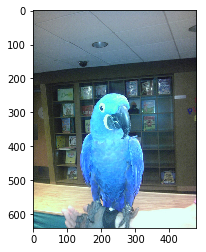

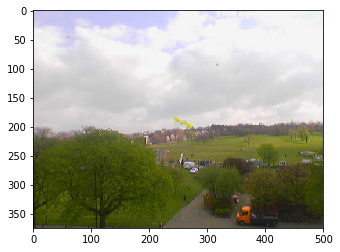

In [3]:
train_images = np.array([name[:-4] for name in os.listdir('/content/train2017_custom_2')])
validation_images = np.array([name[:-4] for name in os.listdir('/content/val2017_custom_2')])
print(train_images[0])
print(len(train_images))
print(len(validation_images))
fig, ax = plt.subplots(1)
ax.imshow(mpimg.imread('/content/train2017_custom_2/' + train_images[0] + '.jpg'))
fig, ax1 = plt.subplots(1)
ax1.imshow(mpimg.imread('/content/val2017_custom_2/' + validation_images[0] + '.jpg'))
plt.show()

In [4]:
!unzip /content/annotations_trainval2017.zip

Archive:  /content/annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


In [5]:
coco_annotation = COCO(annotation_file='/content/annotations/instances_val2017.json')

loading annotations into memory...
Done (t=0.71s)
creating index...
index created!


In [ ]:
#%%bash
#pip install numpy scipy scikit-image matplotlib

In [6]:
import torch
ssd_model = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub','nvidia_ssd')
utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_ssd_processing_utils')

Downloading: "https://github.com/NVIDIA/DeepLearningExamples/archive/torchhub.zip" to /root/.cache/torch/hub/torchhub.zip
/root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub/PyTorch/Classification/ConvNets/image_classification/models/common.py:14: UserWarning: pytorch_quantization module not found, quantization will not be available
  "pytorch_quantization module not found, quantization will not be available"
/root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub/PyTorch/Classification/ConvNets/image_classification/models/efficientnet.py:18: UserWarning: pytorch_quantization module not found, quantization will not be available
  "pytorch_quantization module not found, quantization will not be available"
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

Using cache found in /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


In [7]:
ssd_model.to('cuda')
ssd_model.eval()

SSD300(
  (feature_extractor): ResNet(
    (feature_extractor): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplac

In [8]:
def bb_intersection_over_union(boxA, boxB):
	# determine the (x, y)-coordinates of the intersection rectangle
	xA = max(boxA[0], boxB[0])
	yA = max(boxA[1], boxB[1])
	xB = min(boxA[2], boxB[2])
	yB = min(boxA[3], boxB[3])
	# compute the area of intersection rectangle
	interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
	# compute the area of both the prediction and ground-truth
	# rectangles
	boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
	boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
	# compute the intersection over union by taking the intersection
	# area and dividing it by the sum of prediction + ground-truth
	# areas - the interesection area
	iou = interArea / float(boxAArea + boxBArea - interArea)
	# return the intersection over union value
	return iou

In [ ]:
avgprec = 0
for t in range(10):
  np.random.shuffle(validation_images)
  inputs = [utils.prepare_input('/content/val2017_custom_2/' + image + '.jpg') for image in validation_images[:100]]
  tensor = utils.prepare_tensor(inputs)
  with torch.no_grad():
      detections_batch = ssd_model(tensor)
  results_per_input = utils.decode_results(detections_batch)
  best_results_per_input = [utils.pick_best(results, 0.95) for results in results_per_input]
  total = 0
  correct = 0
  for i in range(100):
    ann_ids = coco_annotation.getAnnIds(imgIds=[int(validation_images[i])])
    target = coco_annotation.loadAnns(ann_ids)
    shape = mpimg.imread('/content/val2017_custom_2/' + validation_images[i] + '.jpg').shape
    boxes = len(best_results_per_input[i][1])
    total += boxes
    for j in range(boxes):
      left, bot, right, top = best_results_per_input[i][0][j]
      output = np.zeros(4)
      output[0] = left*300
      output[1] = bot*300
      output[2] = (right)*300
      output[3] = (top)*300
      #print("output:" + str(output))
      c = False
      for t in target:
        tb = np.copy(t['bbox'])
        tb[0] *= 300/shape[1]
        tb[1] *= 300/shape[0]
        tb[2] = tb[0]+tb[2]*300/shape[1]
        tb[3] = tb[1]+tb[3]*300/shape[0]
        #print(tb)
        iou = bb_intersection_over_union(output, tb)
        #print(ioa)
        if iou > 0.5 and best_results_per_input[i][1][j] == t['category_id']:
          c = True
      if c:
        correct += 1
  avgprec += 1.0*correct/total
avgprec /= 10
print(avgprec)

0.5950943018334323


In [10]:
uris = [
    'http://images.cocodataset.org/val2017/000000397133.jpg',
    'http://images.cocodataset.org/val2017/000000037777.jpg',
    'http://images.cocodataset.org/val2017/000000252219.jpg'
]

In [12]:
inputs = [utils.prepare_input(uri) for uri in uris]
tensor = utils.prepare_tensor(inputs)

In [13]:
with torch.no_grad():
    detections_batch = ssd_model(tensor)

In [14]:
results_per_input = utils.decode_results(detections_batch)
best_results_per_input = [utils.pick_best(results, 0.40) for results in results_per_input]

In [15]:
classes_to_labels = utils.get_coco_object_dictionary()

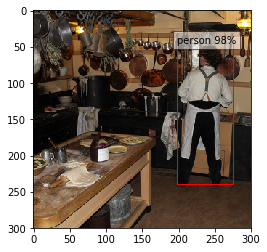

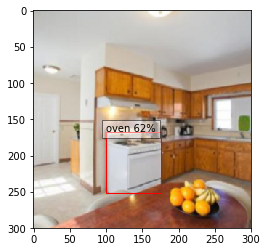

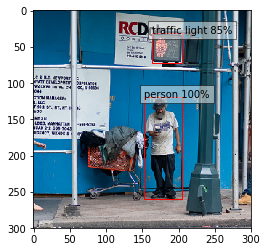

In [16]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches

for image_idx in range(len(best_results_per_input)):
    fig, ax = plt.subplots(1)
    # Show original, denormalized image...
    image = inputs[image_idx] / 2 + 0.5
    ax.imshow(image)
    # ...with detections
    bboxes, classes, confidences = best_results_per_input[image_idx]
    for idx in range(len(bboxes)):
        left, bot, right, top = bboxes[idx]
        x, y, w, h = [val * 300 for val in [left, bot, right - left, top - bot]]
        rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(x, y, "{} {:.0f}%".format(classes_to_labels[classes[idx] - 1], confidences[idx]*100), bbox=dict(facecolor='white', alpha=0.5))
plt.show()